In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train , y_train) , ( X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [10]:
len(X_train)

60000

In [11]:
len(X_test)

10000

In [13]:
X_train[0].shape

(28, 28)

In [15]:
X_train[0] # a 2d array matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

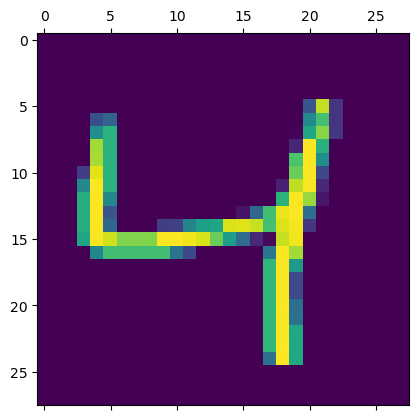

In [17]:
plt.matshow(X_train[2])

In [18]:
y_train[2] # the truth value for X_train[2]

4

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
# Neural Network works better with 1d array , so we flatten the array

In [21]:
X_train.shape # (number of samples ,pixel,pixel )

(60000, 28, 28)

In [41]:
X_train = X_train / 255
X_test = X_test / 255
# used for scaling

In [42]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [36]:
X_train_flattened = X_train.reshape(len(X_train),28*28) # (60000,784)
X_train_flattened.shape

(60000, 784)

In [37]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [38]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
# Simple Neural Network (no hidden layers)

In [40]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # dense layer # 10 output # input_shape = features number
]) # sequential mean i will have a stack of layer of neural networks

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy', # sparse mean output variable is integer, if it was one-hot array , we remove it
    metrics = ['accuracy'] # to make it more accurate
)

model.fit(X_train_flattened,y_train,epochs=5) # epoch is number of iteration for which neural netowrk will run the trainning

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8132 - loss: 0.7184
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9138 - loss: 0.3103
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9214 - loss: 0.2811
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9233 - loss: 0.2698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9253 - loss: 0.2647


In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9145 - loss: 0.3014


[0.26657548546791077, 0.9258000254631042]

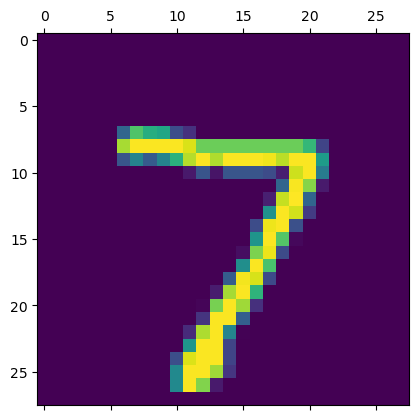

In [47]:
plt.matshow(X_test[0])

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] # the 10 values are the output of the function of neural network

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.6089968e-02, 2.2857115e-07, 4.7077157e-02, 9.6267432e-01,
       2.1136245e-03, 1.0675918e-01, 1.1715813e-06, 9.9975711e-01,
       9.4485290e-02, 5.9802538e-01], dtype=float32)

In [52]:
np.argmax(y_predicted[0])  # prints the maxiaumn value where the correct number is

7

In [57]:
y_predicted[:5] # must convert to a single number before confusion matrix

array([[1.60899684e-02, 2.28571153e-07, 4.70771566e-02, 9.62674320e-01,
        2.11362448e-03, 1.06759183e-01, 1.17158129e-06, 9.99757111e-01,
        9.44852903e-02, 5.98025382e-01],
       [2.60744870e-01, 3.17130331e-03, 9.99542058e-01, 3.08376193e-01,
        1.03357634e-09, 8.31266046e-01, 8.24617505e-01, 1.02996160e-12,
        1.80273369e-01, 4.48759607e-09],
       [2.17823137e-04, 9.91318762e-01, 6.03334785e-01, 2.75994420e-01,
        1.93392020e-02, 8.38546306e-02, 1.16879776e-01, 1.46019265e-01,
        3.53231162e-01, 4.34962511e-02],
       [9.97953832e-01, 1.28127029e-08, 9.99444053e-02, 3.57220252e-03,
        4.54049732e-05, 1.47561356e-01, 8.70577693e-02, 1.36970133e-02,
        2.36197636e-02, 1.37741268e-02],
       [2.90987156e-02, 3.03419965e-05, 1.68945551e-01, 4.13764827e-03,
        9.92716372e-01, 1.73801668e-02, 1.25519678e-01, 2.16501936e-01,
        3.51812541e-01, 7.37843394e-01]], dtype=float32)

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [59]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [61]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    2,    2,    0,   13,    9,    3,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    6,  932,   13,    8,    6,   11,   10,   39,    4],
       [   1,    0,   20,  913,    1,   30,    2,   10,   25,    8],
       [   1,    1,    5,    1,  921,    0,    9,    4,    9,   31],
       [   7,    2,    3,   25,   10,  792,   12,    6,   30,    5],
       [   6,    3,    9,    1,    8,   21,  904,    2,    4,    0],
       [   1,    5,   22,    6,    8,    0,    0,  952,    3,   31],
       [   4,    6,    6,   19,    9,   28,    8,   11,  877,    6],
       [   7,    7,    2,   11,   34,   10,    0,   22,    7,  909]])>

Text(95.72222222222221, 0.5, 'Truth')

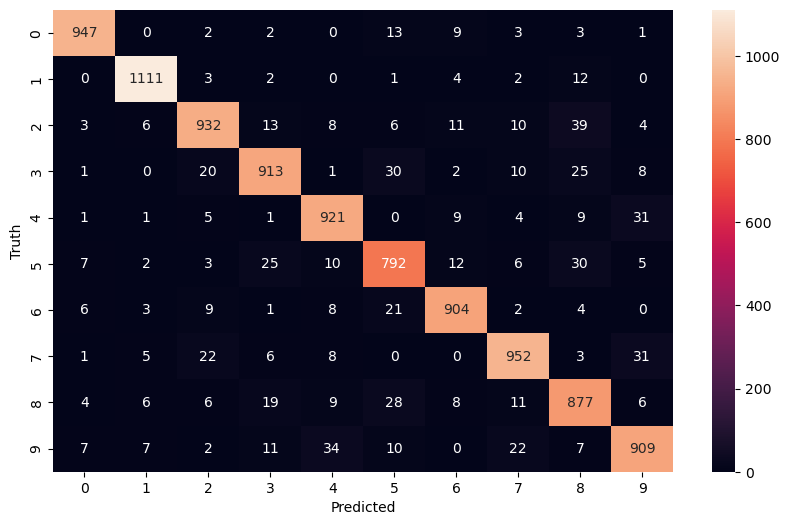

In [65]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d') # fmt to remove the expo
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [66]:
# Adding hidden layer to enhance performance

In [67]:
model = keras.Sequential([ # sequential mean i will have a stack of layer of neural networks
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # dense layer 
    keras.layers.Dense(10,activation='sigmoid') # the hidden layer (no need for input shape)
]) 

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy', # sparse mean output variable is integer, if it was one-hot array , we remove it
    metrics = ['accuracy'] # to make it more accurate
)

model.fit(X_train_flattened,y_train,epochs=5) # epoch is number of iteration for which neural netowrk will run the trainning

C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8741 - loss: 0.4358
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9631 - loss: 0.1235
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0827
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9850 - loss: 0.0496


In [69]:
model.evaluate(X_test_flattened,y_test) # same as model.score 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.0962


[0.07936948537826538, 0.9771000146865845]

In [71]:
model = keras.Sequential([ # sequential mean i will have a stack of layer of neural networks
    keras.layers.Flatten(input_shape=(28,28)), # if u don't want to use X_train_Flattened
    keras.layers.Dense(100,activation='relu'), # dense layer # 10 output 
    keras.layers.Dense(10,activation='sigmoid') # the hidden layer (no need for input shape)
]) 

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy', # sparse mean output variable is integer, if it was one-hot array , we remove it
    metrics = ['accuracy'] # to make it more accurate
)

model.fit(X_train,y_train,epochs=5) # epoch is number of iteration for which neural netowrk will run the trainning

C:\Users\musta\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5406 - loss: 1.7099
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8528 - loss: 0.5684
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8887 - loss: 0.4162
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9003 - loss: 0.3566
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9058 - loss: 0.3272
